# Import the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names


import warnings

In [3]:
df_train = pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")

# Understanding the data

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [21]:
df_train[df_train.select_dtypes(include="object").columns] = df_train.select_dtypes(include="object").astype("category")

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [5]:
def missing_value_table(df):
    missing_value_table_df = pd.DataFrame(index=df.columns,
                                          columns=["count","percentage"],)
    for col in df.columns:

        # total missing value
        missing_value_table_df.loc[col,"count"] = df[col].isnull().sum()

        #percentage of missing value

        missing_value_table_df.loc[col,"percentage"] = df[col].isnull().sum()/df[col].size * 100

    missing_value_table_df =missing_value_table_df.replace(0,np.nan).dropna()
    missing_value_table_df.sort_values("count",inplace=True)
    print(f"Your dataframe contain {len(df.columns)} attributes .")
    print(f"There are {len(missing_value_table_df.index)} attributes that have missing value")

    return missing_value_table_df

In [6]:
missing_df = missing_value_table(df_train)
missing_df

Your dataframe contain 81 attributes .
There are 19 attributes that have missing value


,count,percentage
Electrical,1.0,0.068493
MasVnrType,8.0,0.547945
MasVnrArea,8.0,0.547945
BsmtQual,37.0,2.534247
BsmtCond,37.0,2.534247
BsmtFinType1,37.0,2.534247
BsmtExposure,38.0,2.602740
BsmtFinType2,38.0,2.602740
GarageCond,81.0,5.547945
GarageQual,81.0,5.547945


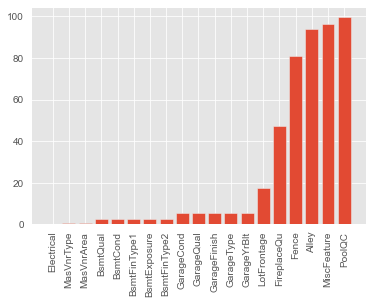

<Figure size 1080x432 with 0 Axes>

In [7]:
plt.bar(missing_df.index ,missing_df["percentage"])
plt.xticks(rotation = 90)
plt.figure(figsize=(15,6))
plt.show()

In [8]:
def cal_bins_freedman_rule(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    bins_width = (2 * iqr) / (len(data)**(1/3))
    return int((np.ceil(data.max() - data.min()))/bins_width)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

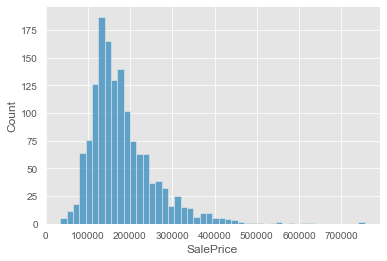

In [9]:
sns.histplot(data=df_train,
             x="SalePrice",
             bins=cal_bins_freedman_rule(df_train["SalePrice"]))


In [10]:
def best_fit_distribution(data,bins = 200):
    y,x = np.histogram(data,bins=bins,density=True)


    # calculating mid point
    x = (x + np.roll(x, -1))[:-1] / 2.0

    all_distn = [e for e in _distn_names if e not in ['levy_stable', 'studentized_range']]
    columns = ["distribution","params","sse"]

    fitted_distribution = pd.DataFrame(index=all_distn,
                                       columns=columns)

    for dist in all_distn:

        distribution = getattr(st,dist)

        try:
            with warnings.catch_warnings():

                warnings.filterwarnings("ignore")

                params = distribution.fit(data)





                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                pdf = distribution.pdf(x,*arg,loc=loc,scale=scale)


                sse = ((y -pdf)**2).sum()

                fitted_distribution.loc[dist] = pd.Series(data=[distribution,params,sse],index=columns)

        except Exception:
            pass

    return fitted_distribution.sort_values("sse")

In [11]:
def make_pdf(dist, params, size=10000):
    """Generate distribution's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [12]:
best_distributions = best_fit_distribution(df_train["SalePrice"])

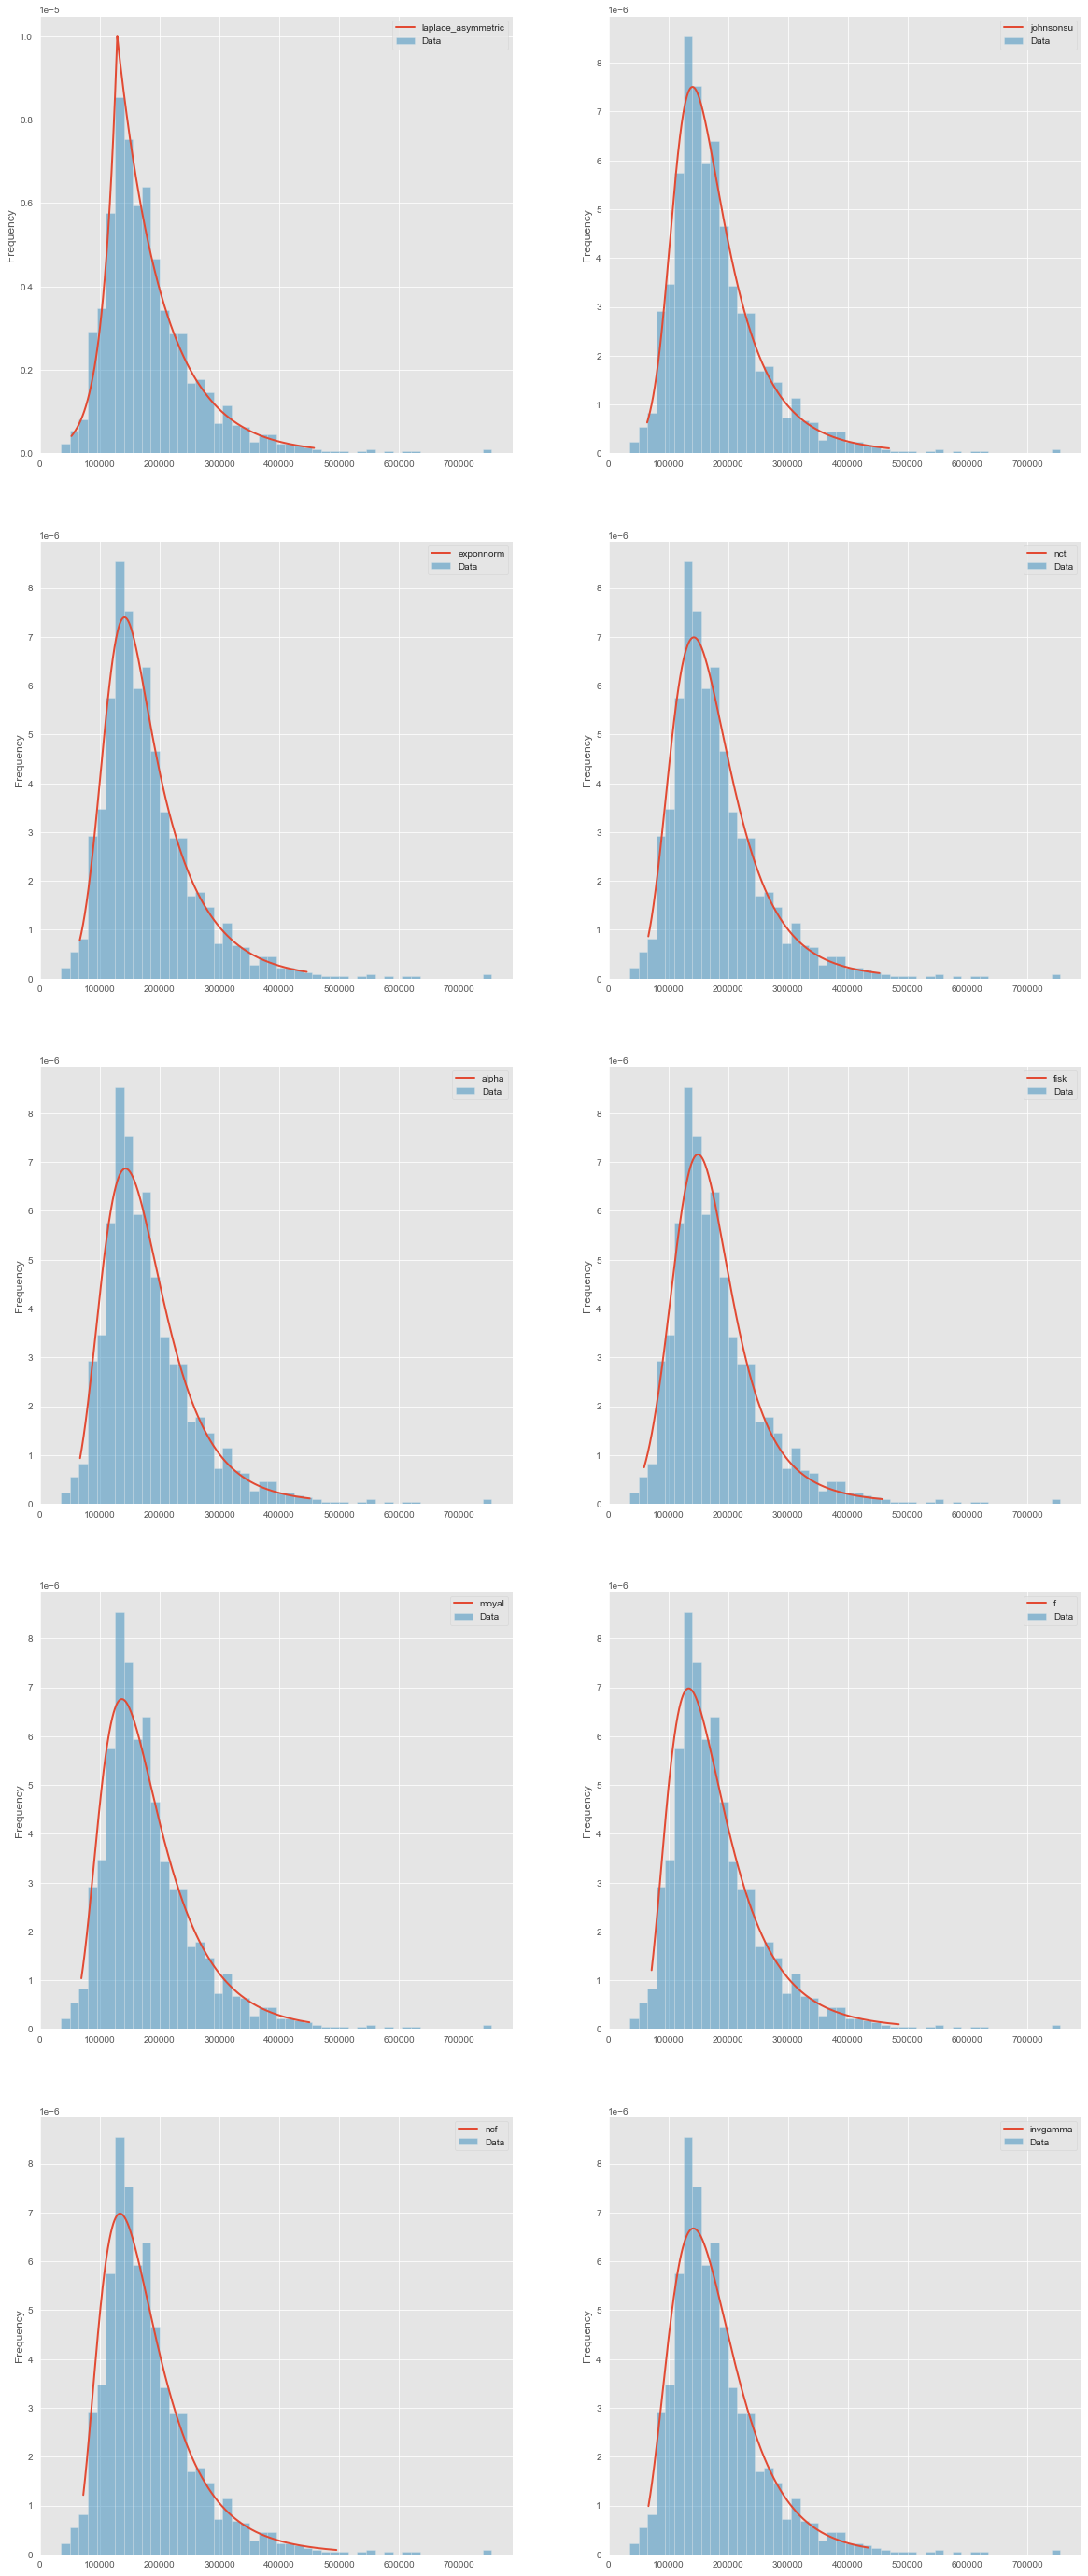

In [13]:
fig ,axes = plt.subplots(5,2,figsize = (20,50))

for ax,dist in zip(axes.flatten(),best_distributions.index[:10]):
    data = df_train["SalePrice"]
    bins = cal_bins_freedman_rule(data)
    pdf = make_pdf(best_distributions.loc[dist,"distribution"],
                   best_distributions.loc[dist,"params"])
    pdf.plot(lw=2, label=dist, legend=True,ax=ax)
    data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

We can see that SalePrice doesn't follow the normal distribution , so before preforming the regression it has to be transformed . While log transformation does the pretty good job , best fit is unbounded Johnson distribution.

In [14]:
test_normality =lambda x : st.shapiro(x.fillna(0))[1] < 0.01
quantitative = df_train.select_dtypes(include="number").drop(columns=["SalePrice","Id"])
p_value = quantitative.apply(test_normality)
print(not p_value.any())

False


Also, none of the quantitative variable has the normal distribution , so these should be transformed as well

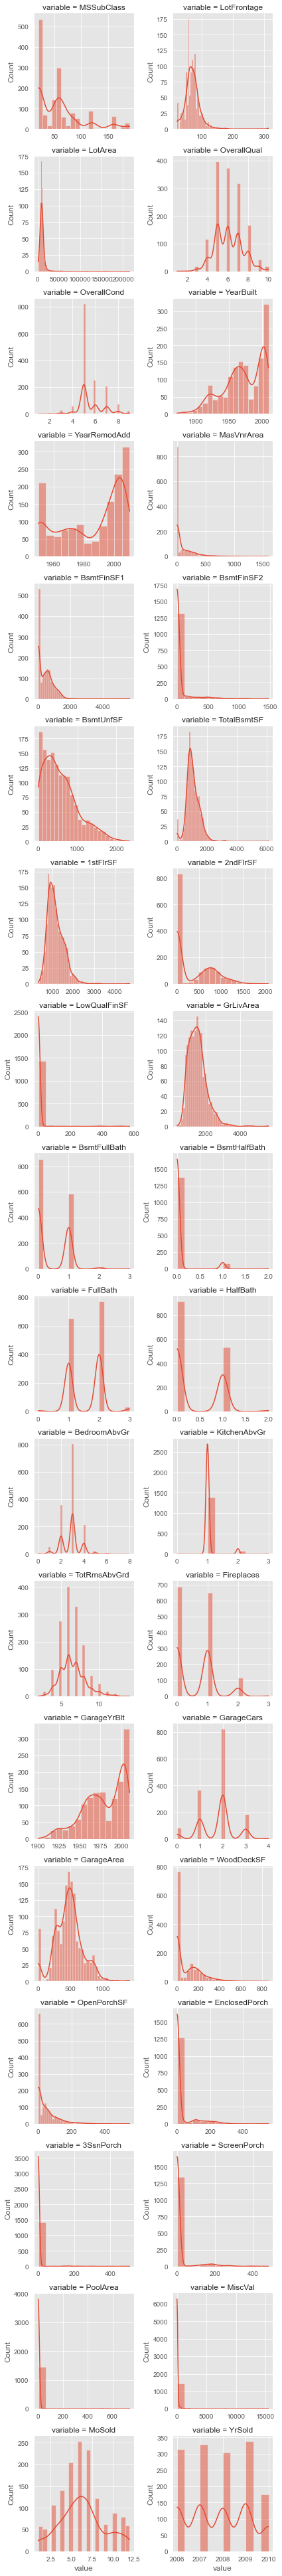

In [15]:
f = pd.melt(quantitative)
g = sns.FacetGrid(f,col="variable",
                  col_wrap=2,
                  sharex=False,
                  sharey=False)
g.map(sns.histplot,"value",kde=True)

Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.

In [24]:
df_train["Street"].cat.add_categories(["Missing"])

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: category
Categories (3, object): ['Grvl', 'Pave', 'Missing']

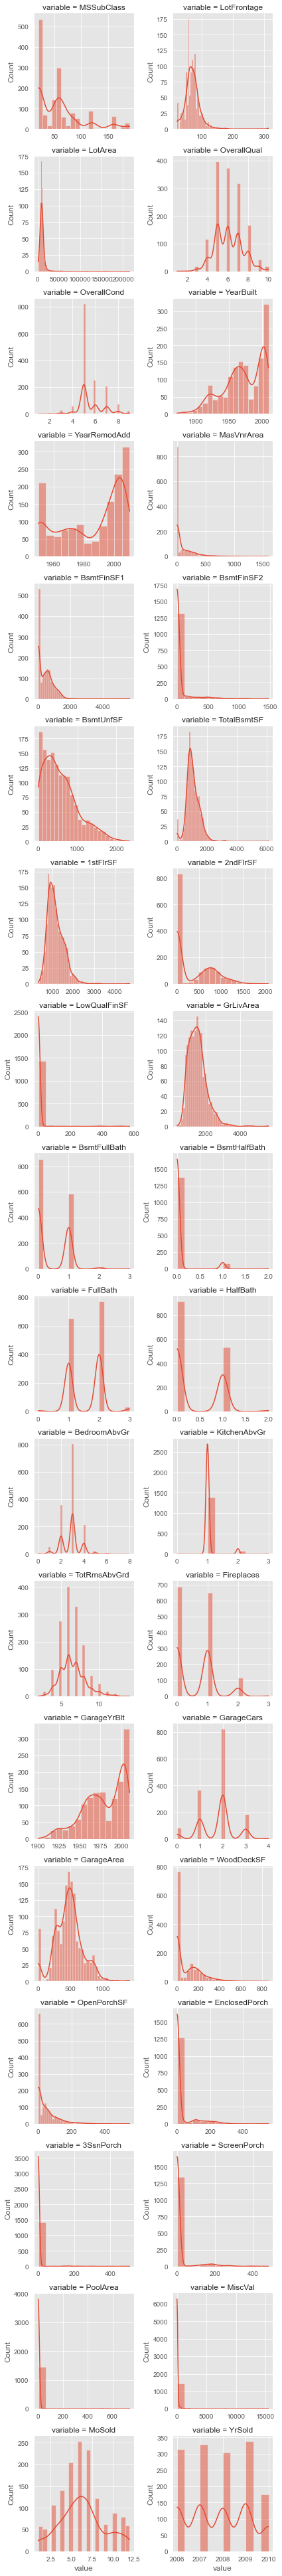

In [25]:
f = pd.melt(quantitative)
g = sns.FacetGrid(f,col="variable",
                  col_wrap=2,
                  sharex=False,
                  sharey=False)
g.map(sns.histplot,"value",kde=True)

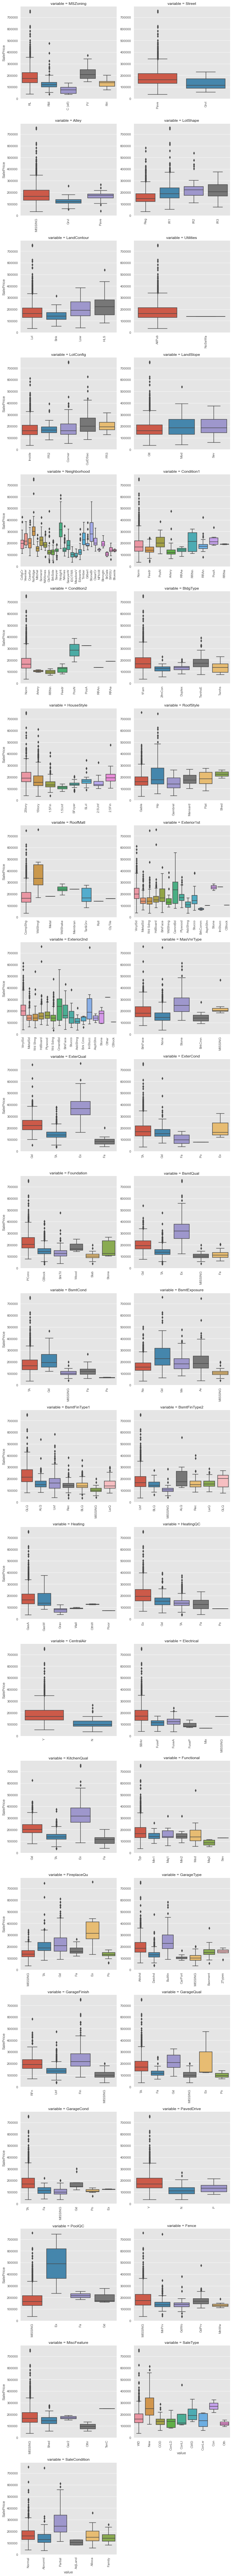

In [26]:
qualitative_col = df_train.select_dtypes(include="category").columns.tolist()

for c in qualitative_col:
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(["MISSING"])
        df_train[c] = df_train[c].fillna("MISSING")

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    plt.xticks(rotation=90)

f = pd.melt(df_train ,id_vars=["SalePrice"],value_vars=qualitative_col)
g = sns.FacetGrid(f,col="variable",
                  col_wrap=2,
                  sharey=False,
                  sharex=False,
                  height=5)
g.map(boxplot,"value","SalePrice")

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values

# ANOVA

 when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels

Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night.


The null hypothesis (H0) of ANOVA is that there is no difference among group means. The alternate hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable

## Influence of categorical variable on SalePrice

1. For each variable the SalePRice is Partition based upon the category
2. Then check the ANOVA test if **set have similar distribution** .
3. if the variable has the minor impact then set of means should be equal.
4. **Decreasing p-value is sign of increasing diversity in partition**

In [49]:
def anova(frame):
    avn = pd.DataFrame()
    avn["feature"] = qualitative_col
    pvals =[]
    for col in qualitative_col:
        samples = []
        for cat in frame[col].cat.categories:
            s = frame[frame[col] == cat]["SalePrice"].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    avn["pval"] =pvals
    return avn.sort_values("pval")

In [50]:
a = anova(df_train)

In [52]:
a["disparity"] =np.log(a["pval"].values)
a

,feature,pval,disparity
8,Neighborhood,1.558600e-225,-517.637858
18,ExterQual,1.439551e-204,-469.363028
21,BsmtQual,8.158548e-196,-449.207612
30,KitchenQual,3.032213e-192,-440.987045
34,GarageFinish,6.228747e-115,-262.968110
32,FireplaceQu,2.971217e-107,-245.287633
20,Foundation,5.791895e-91,-207.778784
33,GarageType,6.117026e-87,-198.513827
24,BsmtFinType1,2.386358e-71,-162.613773
27,HeatingQC,2.667062e-67,-153.292224


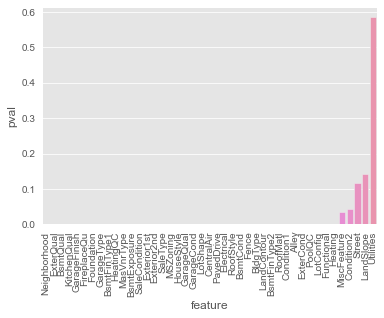

In [55]:
sns.barplot(data= a,
            x="feature",
            y="pval")
plt.xticks(rotation=90);

This graph show that utilities have no or less disparity among the categories in them.
But this does show the which variable have the higher disparity,
so we do **log transformation** in tha data

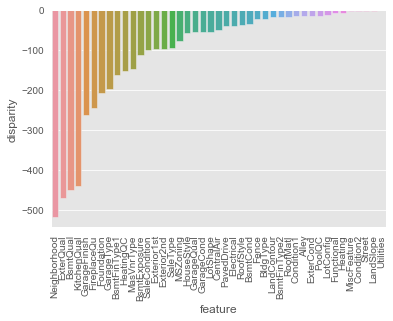

In [56]:
sns.barplot(data= a,
            x="feature",
            y="disparity")
plt.xticks(rotation=90);

Since this is upside down we will flip the graph . Using the **reciprocal transformation**

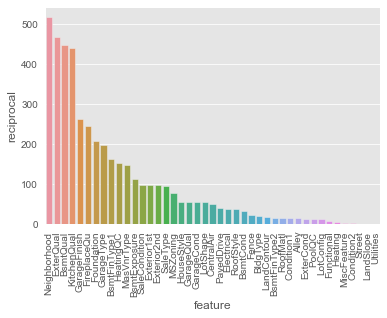

In [58]:
a["reciprocal"] = a["disparity"] =np.log(1./a["pval"].values)
sns.barplot(data=a,
            x="feature",
            y="reciprocal")
plt.xticks(rotation = 90);

In [59]:
df_train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [61]:
test = df_train[["SalePrice","MSZoning"]]
test

,SalePrice,MSZoning
0,208500,RL
1,181500,RL
2,223500,RL
3,140000,RL
4,250000,RL
...,...,...
1455,175000,RL
1456,210000,RL
1457,266500,RL
1458,142125,RL


In [64]:
test.pivot_table(values="SalePrice",
                 index="MSZoning",
                 aggfunc=np.mean).sort_values("SalePrice")

,SalePrice
MSZoning,
C (all),74528.000000
RM,126316.830275
RH,131558.375000
RL,191004.994787
FV,214014.061538


In [66]:
df_train["OverallQual"].corr(df_train["SalePrice"])

0.7909816005838046

{0: 1, 1: 2, 2: 3, 3: 4}